In [62]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np 
import os as os
import math
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as sm
import seaborn as sn

print(os.getcwd())

/content


In [63]:
print(os.getcwd())
path_file = '/content'
path_data = '/content/data_nndl'
# set path to data and load data 
## not pd.read_csv('datafile.csv') because we need array not data frame
os.chdir(path_data)
os.getcwd()


x_train = np.genfromtxt(path_data + '/csvTrainImages 60k x 784.csv', delimiter = ',')
y_train = np.genfromtxt(path_data + '/csvTrainLabel 60k x 1.csv', delimiter = ',')
x_test = np.genfromtxt(path_data + '/csvTestImages 10k x 784.csv', delimiter = ',')
y_test = np.genfromtxt(path_data + '/csvTestLabel 10k x 1.csv', delimiter = ',')

# convert to float (pixel values are integers)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# convert class vectors to binary class matrices
num_classes = 10 # 10 digits to classify, 0 - 9
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# reset path to original directory
os.chdir(path_file)
os.getcwd()

/content


'/content'

# Data Description


* arabic numbers, handwritten by 700 participants, each of them writing the number 0-9 for a total of 10 times. 
* each in a image file of yz x yx pixels
* this results in 70k observations, for each observation we have a image of said pixel size and a labe of what the participant acutally wanted to write. 
* data already partitioned into train and test data sets and converted into CSV files for easier accesaability. 
* CSV contains the flattend array of pixel values. 




In [64]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

Dimensions of the training and test data set look good. We have 60k image observations for training and validation, and keep 10k observations for the final test of the neural net.  

To make sure there where no fautly conversion, we plot a couple of numbers from the CSV flattend array and compare them to the acutal images. 

In [65]:
x_train_2d = np.reshape(x_train,(60000,28,28))
x_train_2d.shape
# shows that now we have no longer a o-dimensional array of 60k x 784 but the restored pixel dimensions of the original image

(60000, 28, 28)

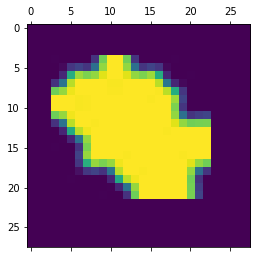

In [66]:
plt.matshow(x_train_2d[0])

# PLUS ACTUAL IMAGE

In [67]:
y_train[4]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

having hade a discussion about data proceed now to formulate the first neural network. 

**sources for different parameters**
- rob's lectures
- youtube tutorial => https://www.youtube.com/watch?v=iqQgED9vV7k&ab_channel=codebasics
- batch size differences => https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e


# 1st neural net
To start we begin with a simple 1 layer NN. We choose a dense layer, using 10 nodes, giving space to classify each of the available digits from 0-9. to keep it simple we use sigmoid ad a activation function. 


In [68]:
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(x_train.shape[1],), activation='sigmoid'),
])
model1.summary()
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [69]:
model1.fit(x_train, y_train,
           batch_size = 128, 
           epochs = 5, 
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

#validation_data=(x_test, y_test)) ??

print('> model evaluation')
model1.evaluate(x_test, y_test, verbose = 1)

Epoch 1/5
329/329 [==============================] - 1s 2ms/step - loss: 8.2457 - accuracy: 0.8754 - val_loss: 3.6520 - val_accuracy: 0.9253
Epoch 2/5
329/329 [==============================] - 1s 2ms/step - loss: 2.3136 - accuracy: 0.9464 - val_loss: 3.0437 - val_accuracy: 0.9284
Epoch 3/5
329/329 [==============================] - 1s 2ms/step - loss: 1.6467 - accuracy: 0.9550 - val_loss: 2.5515 - val_accuracy: 0.9383
Epoch 4/5
329/329 [==============================] - 1s 2ms/step - loss: 1.4836 - accuracy: 0.9579 - val_loss: 2.5121 - val_accuracy: 0.9411
Epoch 5/5
329/329 [==============================] - 1s 2ms/step - loss: 1.3377 - accuracy: 0.9611 - val_loss: 2.4293 - val_accuracy: 0.9420
> model evaluation
313/313 [==============================] - 0s 703us/step - loss: 2.4515 - accuracy: 0.9402


[2.451476573944092, 0.9401999711990356]

# 2nd neural net

mentioned in the lecture slides and also youtube sources, standardizing the pixel values for a range of 0-1 should improve accuracy

In [70]:
x_train_stan = x_train / 255
x_test_stan = x_test / 255

In [71]:
model2 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(x_train_stan.shape[1],), activation='sigmoid'),
])
model2.summary()
model2.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [72]:
model2.fit(x_train_stan, y_train,
           batch_size = 128, 
           epochs = 5, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model2.evaluate(x_test_stan, y_test, verbose = 1)

Epoch 1/5
329/329 [==============================] - 1s 2ms/step - loss: 0.6027 - accuracy: 0.8758 - val_loss: 0.3143 - val_accuracy: 0.9329
Epoch 2/5
329/329 [==============================] - 1s 2ms/step - loss: 0.2254 - accuracy: 0.9499 - val_loss: 0.2289 - val_accuracy: 0.9462
Epoch 3/5
329/329 [==============================] - 1s 2ms/step - loss: 0.1740 - accuracy: 0.9588 - val_loss: 0.1951 - val_accuracy: 0.9526
Epoch 4/5
329/329 [==============================] - 1s 2ms/step - loss: 0.1493 - accuracy: 0.9642 - val_loss: 0.1780 - val_accuracy: 0.9554
Epoch 5/5
329/329 [==============================] - 1s 2ms/step - loss: 0.1342 - accuracy: 0.9673 - val_loss: 0.1659 - val_accuracy: 0.9578
> model evaluation
313/313 [==============================] - 0s 712us/step - loss: 0.1739 - accuracy: 0.9538


[0.1738690882921219, 0.9538000226020813]

no decrease in accuracy so we continue henceforth with the standardized pixel values. 


but accuracy is still improvable, thus we want to experiment with a multi-layerd neural net. 

# 3rd neural net
following the exercise jupyter notebook from the lecture 3 (mnist_mlp.ipynb) we try a model with more layers

- relu for activatzion function, should be better. 
- soft max better for classification, dense10 at the end remains => makes sense

In [73]:
model3 = keras.Sequential([
    keras.layers.Dense(512, input_shape=(x_train_stan.shape[1],), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
])
model3.summary() ;
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_58 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [74]:
model3.fit(x_train_stan, y_train,
           batch_size = 128, 
           epochs = 5, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model3.evaluate(x_test_stan, y_test, verbose = 1)

Epoch 1/5
329/329 [==============================] - 5s 13ms/step - loss: 0.1769 - accuracy: 0.9517 - val_loss: 0.0937 - val_accuracy: 0.9741
Epoch 2/5
329/329 [==============================] - 4s 13ms/step - loss: 0.0566 - accuracy: 0.9840 - val_loss: 0.0704 - val_accuracy: 0.9798
Epoch 3/5
329/329 [==============================] - 4s 13ms/step - loss: 0.0400 - accuracy: 0.9881 - val_loss: 0.0713 - val_accuracy: 0.9802
Epoch 4/5
329/329 [==============================] - 4s 12ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0757 - val_accuracy: 0.9794
Epoch 5/5
329/329 [==============================] - 4s 13ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0763 - val_accuracy: 0.9809
> model evaluation
313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9808


[0.07091709226369858, 0.9807999730110168]

# 4th neural net dense only

Data still 1D array, additional Flatten() layers


In [75]:
model4 = keras.Sequential([
    keras.layers.Dense(512, input_shape=(x_train_stan.shape[1],), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])

model4.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

model4.fit(x_train_stan, y_train,
           batch_size = 128, 
           epochs = 10, 
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model4.evaluate(x_test_stan, y_test, verbose = 1)


Epoch 1/10
329/329 [==============================] - 5s 13ms/step - loss: 0.1701 - accuracy: 0.9531 - val_loss: 0.0976 - val_accuracy: 0.9737
Epoch 2/10
329/329 [==============================] - 4s 13ms/step - loss: 0.0563 - accuracy: 0.9836 - val_loss: 0.0836 - val_accuracy: 0.9777
Epoch 3/10
329/329 [==============================] - 4s 13ms/step - loss: 0.0374 - accuracy: 0.9892 - val_loss: 0.0845 - val_accuracy: 0.9764
Epoch 4/10
329/329 [==============================] - 4s 13ms/step - loss: 0.0264 - accuracy: 0.9925 - val_loss: 0.0764 - val_accuracy: 0.9799
Epoch 5/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0616 - val_accuracy: 0.9837
Epoch 6/10
329/329 [==============================] - 4s 13ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0744 - val_accuracy: 0.9818
Epoch 7/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0771 - val_accuracy: 0.9836

[0.08301497995853424, 0.9822999835014343]

# 5th neural net 
still 1d array with flatten layers and many more dense layers, declining in size

In [76]:
model5 = keras.Sequential([
    keras.layers.Dense(512, input_shape=(x_train_stan.shape[1],), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(342, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(225, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(135, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(81, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),    keras.layers.Dense(10, activation='softmax'),
])

model5.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

model5.fit(x_train_stan, y_train,
           batch_size = 128, 
           epochs = 10, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model5.evaluate(x_test_stan, y_test, verbose = 1)


Epoch 1/10
329/329 [==============================] - 15s 45ms/step - loss: 0.2727 - accuracy: 0.9224 - val_loss: 0.1161 - val_accuracy: 0.9715
Epoch 2/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0803 - accuracy: 0.9798 - val_loss: 0.0891 - val_accuracy: 0.9773
Epoch 3/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0590 - accuracy: 0.9854 - val_loss: 0.0896 - val_accuracy: 0.9800
Epoch 4/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0449 - accuracy: 0.9883 - val_loss: 0.0788 - val_accuracy: 0.9809
Epoch 5/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0376 - accuracy: 0.9900 - val_loss: 0.0904 - val_accuracy: 0.9784
Epoch 6/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0399 - accuracy: 0.9900 - val_loss: 0.0851 - val_accuracy: 0.9813
Epoch 7/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0270 - accuracy: 0.9930 - val_loss: 0.0765 - val_accuracy: 0.983

[0.10022571682929993, 0.9818000197410583]

# CONVOLUTIONAL NEURAL NETS
following lecture slides, we learned that 2d arrrays work better for number recognition as they can be read by a convolutional network

following the lecture slides, we know that convoluted networks are better suited for image classification. 
following the exercise jupyter notebook from the (mnist_cnn.ipynb) we try a model with more layers

relu for activatzion function, should be better.
soft max better for classification, dense10 at the end remains => makes sens


for convolution nets to work we need to restructre the data back to multidimensional array from the flattened version we imported from *csv*

In [77]:
x_train_2d_stan = np.reshape(x_train_stan,(60000,28,28,1))
x_test_2d_stan = np.reshape(x_test_stan,(10000,28,28,1))

# Conv 1st neural net

In [94]:
num_filters = 12
filter_size = 5
pool_size = 2

modelc1 = keras.Sequential([
  keras.layers.Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(pool_size=pool_size),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation='softmax'),
])

modelc1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelc1.fit(x_train_2d_stan, y_train, 
          validation_split = 0.3,
          shuffle = True, 
          epochs= 15,
          verbose = 1)

modelc1.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/15
1313/1313 [==============================] - 15s 11ms/step - loss: 0.1580 - accuracy: 0.9589 - val_loss: 0.1055 - val_accuracy: 0.9712
Epoch 2/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0694 - accuracy: 0.9807 - val_loss: 0.0830 - val_accuracy: 0.9765
Epoch 3/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0490 - accuracy: 0.9861 - val_loss: 0.0710 - val_accuracy: 0.9801
Epoch 4/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0374 - accuracy: 0.9898 - val_loss: 0.0600 - val_accuracy: 0.9833
Epoch 5/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0303 - accuracy: 0.9914 - val_loss: 0.0529 - val_accuracy: 0.9844
Epoch 6/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0241 - accuracy: 0.9931 - val_loss: 0.0539 - val_accuracy: 0.9842
Epoch 7/15
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0206 - accuracy: 0.9942 - val_loss: 0.0534 -

[0.05243486911058426, 0.9869999885559082]

# Conv 2nd neural net
2d array, bigger kernel used

In [79]:
#  2D,  grössser kernel Conv2D eingebaut 
modelc2 = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])

modelc2.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

modelc2.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 10, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
modelc2.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/10
329/329 [==============================] - 14s 42ms/step - loss: 0.3892 - accuracy: 0.9170 - val_loss: 0.0911 - val_accuracy: 0.9778
Epoch 2/10
329/329 [==============================] - 14s 41ms/step - loss: 0.0623 - accuracy: 0.9836 - val_loss: 0.0616 - val_accuracy: 0.9834
Epoch 3/10
329/329 [==============================] - 13s 41ms/step - loss: 0.0457 - accuracy: 0.9876 - val_loss: 0.0555 - val_accuracy: 0.9851
Epoch 4/10
329/329 [==============================] - 13s 41ms/step - loss: 0.0371 - accuracy: 0.9899 - val_loss: 0.0519 - val_accuracy: 0.9860
Epoch 5/10
329/329 [==============================] - 14s 41ms/step - loss: 0.0327 - accuracy: 0.9911 - val_loss: 0.0419 - val_accuracy: 0.9873
Epoch 6/10
329/329 [==============================] - 13s 41ms/step - loss: 0.0287 - accuracy: 0.9920 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 7/10
329/329 [==============================] - 13s 41ms/step - loss: 0.0266 - accuracy: 0.9927 - val_loss: 0.0372 - val_accuracy:

[0.03949955478310585, 0.9873999953269958]

#Conv 3rd neural net
bigger kernel, more dense layers at the end

In [96]:
#  2D,  grössseres Conv2D eingebaut, mit mehr dense am ende
modelc3 = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

modelc3.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

modelc3.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 10, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
modelc3.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/10
329/329 [==============================] - 15s 45ms/step - loss: 0.1954 - accuracy: 0.9510 - val_loss: 0.0653 - val_accuracy: 0.9816
Epoch 2/10
329/329 [==============================] - 15s 46ms/step - loss: 0.0452 - accuracy: 0.9866 - val_loss: 0.0429 - val_accuracy: 0.9870
Epoch 3/10
329/329 [==============================] - 15s 46ms/step - loss: 0.0363 - accuracy: 0.9895 - val_loss: 0.0341 - val_accuracy: 0.9907
Epoch 4/10
329/329 [==============================] - 15s 46ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0379 - val_accuracy: 0.9878
Epoch 5/10
329/329 [==============================] - 15s 46ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0307 - val_accuracy: 0.9909
Epoch 6/10
329/329 [==============================] - 15s 45ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0330 - val_accuracy: 0.9898
Epoch 7/10
329/329 [==============================] - 15s 46ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0335 - val_accuracy:

[0.028519269078969955, 0.9914000034332275]

# Conv 4th neural net
bigger kernel, 3 kernels, then dense, dropout and flatten layers, padding of 1 pixel

In [83]:
#  2D,  grössseres und mehr Conv2D eingebaut
modelc4 = keras.Sequential([
    keras.layers.ZeroPadding2D(padding=(1,1)),
    keras.layers.Conv2D(32, kernel_size=(14, 14),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.Conv2D(64, kernel_size=(6, 6),activation='relu'),
    keras.layers.Conv2D(128, kernel_size=(3, 3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
])

modelc4.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

modelc4.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
modelc4.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/15
329/329 [==============================] - 117s 352ms/step - loss: 0.2474 - accuracy: 0.9253 - val_loss: 0.0685 - val_accuracy: 0.9804
Epoch 2/15
329/329 [==============================] - 115s 351ms/step - loss: 0.0607 - accuracy: 0.9843 - val_loss: 0.0512 - val_accuracy: 0.9863
Epoch 3/15
329/329 [==============================] - 115s 350ms/step - loss: 0.0461 - accuracy: 0.9879 - val_loss: 0.0541 - val_accuracy: 0.9853
Epoch 4/15
329/329 [==============================] - 115s 349ms/step - loss: 0.0432 - accuracy: 0.9890 - val_loss: 0.0604 - val_accuracy: 0.9851
Epoch 5/15
329/329 [==============================] - 115s 349ms/step - loss: 0.0349 - accuracy: 0.9905 - val_loss: 0.0449 - val_accuracy: 0.9882
Epoch 6/15
329/329 [==============================] - 115s 350ms/step - loss: 0.0314 - accuracy: 0.9914 - val_loss: 0.0530 - val_accuracy: 0.9870
Epoch 7/15
329/329 [==============================] - 115s 350ms/step - loss: 0.0293 - accuracy: 0.9919 - val_loss: 0.0479 -

[0.047644421458244324, 0.9890000224113464]

# Conv 5th neural net
padding of 2 pixels, smaller kernels but much more of them

In [84]:
#  2D,  kleiner aber mehrere layers Conv2D eingebaut
modelc5 = keras.Sequential([
    keras.layers.ZeroPadding2D(padding=(2,2)),
    keras.layers.Conv2D(18, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size=(5, 5),activation='relu'),
    keras.layers.Conv2D(18, kernel_size=(4, 4),activation='relu'),
    keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu'),    
    keras.layers.Conv2D(32, kernel_size=(2, 2),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
])

modelc5.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

modelc5.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
modelc5.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/15
329/329 [==============================] - 134s 406ms/step - loss: 0.1823 - accuracy: 0.9431 - val_loss: 0.0657 - val_accuracy: 0.9820
Epoch 2/15
329/329 [==============================] - 133s 405ms/step - loss: 0.0409 - accuracy: 0.9879 - val_loss: 0.0344 - val_accuracy: 0.9900
Epoch 3/15
329/329 [==============================] - 133s 405ms/step - loss: 0.0322 - accuracy: 0.9910 - val_loss: 0.0410 - val_accuracy: 0.9878
Epoch 4/15
329/329 [==============================] - 133s 405ms/step - loss: 0.0274 - accuracy: 0.9918 - val_loss: 0.0317 - val_accuracy: 0.9899
Epoch 5/15
329/329 [==============================] - 133s 406ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0294 - val_accuracy: 0.9903
Epoch 6/15
329/329 [==============================] - 133s 404ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0345 - val_accuracy: 0.9905
Epoch 7/15
329/329 [==============================] - 133s 404ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0354 -

[0.04625444486737251, 0.9883000254631042]

# Conv 6th neural net 
kernel size of conv 2nd net, more dense layers at the end.

In [85]:
#  2D,  grössseres Conv2D eingebaut, mit noch mehr dense am ende
modelc6 = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(10, activation='softmax'),
])

modelc6.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

modelc6.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
modelc6.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/15
329/329 [==============================] - 16s 47ms/step - loss: 0.3587 - accuracy: 0.8868 - val_loss: 0.0596 - val_accuracy: 0.9854
Epoch 2/15
329/329 [==============================] - 15s 46ms/step - loss: 0.0630 - accuracy: 0.9836 - val_loss: 0.0604 - val_accuracy: 0.9833
Epoch 3/15
329/329 [==============================] - 15s 46ms/step - loss: 0.0446 - accuracy: 0.9881 - val_loss: 0.0400 - val_accuracy: 0.9891
Epoch 4/15
329/329 [==============================] - 15s 46ms/step - loss: 0.0378 - accuracy: 0.9893 - val_loss: 0.0432 - val_accuracy: 0.9887
Epoch 5/15
329/329 [==============================] - 15s 46ms/step - loss: 0.0334 - accuracy: 0.9915 - val_loss: 0.0403 - val_accuracy: 0.9888
Epoch 6/15
329/329 [==============================] - 15s 46ms/step - loss: 0.0272 - accuracy: 0.9927 - val_loss: 0.0326 - val_accuracy: 0.9916
Epoch 7/15
329/329 [==============================] - 15s 46ms/step - loss: 0.0280 - accuracy: 0.9926 - val_loss: 0.0314 - val_accuracy:

[0.039946287870407104, 0.9902999997138977]

# PARAMETERS SPECIFICATION

having found 3rd model to have the highest accuracy in testing, we continue to evaluate different parameters for the model compilation. 

## different loss function
loss = keras.losses.categorical_crossentropy

In [86]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/15
329/329 [==============================] - 15s 46ms/step - loss: 0.2037 - accuracy: 0.9475 - val_loss: 0.0644 - val_accuracy: 0.9825
Epoch 2/15
329/329 [==============================] - 15s 45ms/step - loss: 0.0469 - accuracy: 0.9867 - val_loss: 0.0449 - val_accuracy: 0.9863
Epoch 3/15
329/329 [==============================] - 15s 45ms/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: 0.0356 - val_accuracy: 0.9901
Epoch 4/15
329/329 [==============================] - 15s 45ms/step - loss: 0.0279 - accuracy: 0.9916 - val_loss: 0.0369 - val_accuracy: 0.9888
Epoch 5/15
329/329 [==============================] - 15s 45ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0300 - val_accuracy: 0.9911
Epoch 6/15
329/329 [==============================] - 15s 45ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0394 - val_accuracy: 0.9889
Epoch 7/15
329/329 [==============================] - 15s 45ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0307 - val_accuracy:

[0.030769916251301765, 0.9914000034332275]

# different loss function, different optimizer

optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy

In [87]:
# 2D,  grössseres Conv2D eingebaut, mit mehr dense am ende
# andere loss function, andere optimizer function

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/15
329/329 [==============================] - 15s 46ms/step - loss: 2.3070 - accuracy: 0.0929 - val_loss: 2.2975 - val_accuracy: 0.1210
Epoch 2/15
329/329 [==============================] - 15s 45ms/step - loss: 2.2892 - accuracy: 0.1249 - val_loss: 2.2765 - val_accuracy: 0.1701
Epoch 3/15
329/329 [==============================] - 15s 45ms/step - loss: 2.2711 - accuracy: 0.1668 - val_loss: 2.2554 - val_accuracy: 0.2608
Epoch 4/15
329/329 [==============================] - 15s 45ms/step - loss: 2.2523 - accuracy: 0.2217 - val_loss: 2.2340 - val_accuracy: 0.3725
Epoch 5/15
329/329 [==============================] - 15s 45ms/step - loss: 2.2339 - accuracy: 0.2817 - val_loss: 2.2120 - val_accuracy: 0.4632
Epoch 6/15
329/329 [==============================] - 15s 45ms/step - loss: 2.2137 - accuracy: 0.3423 - val_loss: 2.1888 - val_accuracy: 0.5306
Epoch 7/15
329/329 [==============================] - 15s 45ms/step - loss: 2.1918 - accuracy: 0.3968 - val_loss: 2.1642 - val_accuracy:

[1.8971047401428223, 0.774399995803833]

# different loss function, differnent batch_size
loss = keras.losses.categorical_crossentropy
batch_size = 512

In [88]:


model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train_2d_stan, y_train,
           batch_size = 512, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/15
83/83 [==============================] - 15s 170ms/step - loss: 0.5036 - accuracy: 0.8802 - val_loss: 0.1047 - val_accuracy: 0.9687
Epoch 2/15
83/83 [==============================] - 14s 163ms/step - loss: 0.0831 - accuracy: 0.9754 - val_loss: 0.0628 - val_accuracy: 0.9829
Epoch 3/15
83/83 [==============================] - 13s 163ms/step - loss: 0.0571 - accuracy: 0.9831 - val_loss: 0.0513 - val_accuracy: 0.9856
Epoch 4/15
83/83 [==============================] - 13s 163ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.0427 - val_accuracy: 0.9883
Epoch 5/15
83/83 [==============================] - 13s 163ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0391 - val_accuracy: 0.9891
Epoch 6/15
83/83 [==============================] - 13s 162ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0330 - val_accuracy: 0.9908
Epoch 7/15
83/83 [==============================] - 13s 162ms/step - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0310 - val_accuracy: 0.9906

[0.027373697608709335, 0.9909999966621399]

# only different batch_size
batch_size = 512

In [89]:
# 2D,  grössseres Conv2D eingebaut, mit mehr dense am ende
# nur andere batch size

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_2d_stan, y_train,
           batch_size = 512, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/15
83/83 [==============================] - 14s 164ms/step - loss: 0.4474 - accuracy: 0.8979 - val_loss: 0.0882 - val_accuracy: 0.9758
Epoch 2/15
83/83 [==============================] - 13s 162ms/step - loss: 0.0705 - accuracy: 0.9798 - val_loss: 0.0532 - val_accuracy: 0.9863
Epoch 3/15
83/83 [==============================] - 13s 162ms/step - loss: 0.0497 - accuracy: 0.9857 - val_loss: 0.0496 - val_accuracy: 0.9858
Epoch 4/15
83/83 [==============================] - 13s 162ms/step - loss: 0.0454 - accuracy: 0.9865 - val_loss: 0.0381 - val_accuracy: 0.9895
Epoch 5/15
83/83 [==============================] - 13s 162ms/step - loss: 0.0343 - accuracy: 0.9899 - val_loss: 0.0403 - val_accuracy: 0.9886
Epoch 6/15
83/83 [==============================] - 13s 161ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0346 - val_accuracy: 0.9894
Epoch 7/15
83/83 [==============================] - 13s 161ms/step - loss: 0.0303 - accuracy: 0.9913 - val_loss: 0.0325 - val_accuracy: 0.9907

[0.03186453878879547, 0.9908000230789185]

# only different batch_size
# 2000

In [90]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_2d_stan, y_train,
           batch_size = 2000, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/15
21/21 [==============================] - 13s 605ms/step - loss: 1.3476 - accuracy: 0.7024 - val_loss: 0.3364 - val_accuracy: 0.9237
Epoch 2/15
21/21 [==============================] - 13s 599ms/step - loss: 0.1945 - accuracy: 0.9453 - val_loss: 0.1160 - val_accuracy: 0.9658
Epoch 3/15
21/21 [==============================] - 13s 599ms/step - loss: 0.1084 - accuracy: 0.9683 - val_loss: 0.0844 - val_accuracy: 0.9774
Epoch 4/15
21/21 [==============================] - 12s 599ms/step - loss: 0.0830 - accuracy: 0.9760 - val_loss: 0.0669 - val_accuracy: 0.9821
Epoch 5/15
21/21 [==============================] - 12s 597ms/step - loss: 0.0703 - accuracy: 0.9796 - val_loss: 0.0615 - val_accuracy: 0.9834
Epoch 6/15
21/21 [==============================] - 12s 597ms/step - loss: 0.0610 - accuracy: 0.9823 - val_loss: 0.0561 - val_accuracy: 0.9846
Epoch 7/15
21/21 [==============================] - 12s 599ms/step - loss: 0.0557 - accuracy: 0.9838 - val_loss: 0.0524 - val_accuracy: 0.9858

[0.037829719483852386, 0.9876000285148621]

# different optimizer, learning rate 
now optimizer with learning rate = 1e-6

In [91]:
# 2D,  grössseres Conv2D eingebaut, mit mehr dense am ende
# andere optimizer function RMSprop, mit learning rate

from keras.optimizers import RMSprop

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer = keras.optimizers.RMSprop(lr=1e-6),
              loss = keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model.evaluate(x_test_2d_stan, y_test, verbose = 1)



Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


329/329 [==============================] - 16s 46ms/step - loss: 2.2897 - accuracy: 0.1387 - val_loss: 2.2717 - val_accuracy: 0.1821
Epoch 2/15
329/329 [==============================] - 15s 45ms/step - loss: 2.2666 - accuracy: 0.1723 - val_loss: 2.2470 - val_accuracy: 0.2317
Epoch 3/15
329/329 [==============================] - 15s 45ms/step - loss: 2.2451 - accuracy: 0.2055 - val_loss: 2.2229 - val_accuracy: 0.2945
Epoch 4/15
329/329 [==============================] - 15s 45ms/step - loss: 2.2231 - accuracy: 0.2405 - val_loss: 2.1989 - val_accuracy: 0.3323
Epoch 5/15
329/329 [==============================] - 15s 46ms/step - loss: 2.2011 - accuracy: 0.2736 - val_loss: 2.1748 - val_accuracy: 0.3494
Epoch 6/15
329/329 [==============================] - 15s 46ms/step - loss: 2.1789 - accuracy: 0.2998 - val_loss: 2.1502 - val_accuracy: 0.3723
Epoch 7/15
329/329 [==============================] - 15s 46ms/step - loss: 2.1557 - accuracy: 0.3252 - val_loss: 2.1246 - val_accuracy: 0.3983
Epo

[1.884812831878662, 0.6654999852180481]


# different optimizer, learning rate 2
now optimizer with learning rate = 0.01


In [92]:
# 2D,  grössseres Conv2D eingebaut, mit mehr dense am ende
# andere optimizer function RMSprop, mit learning rate : 0.01

from keras.optimizers import RMSprop

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer = keras.optimizers.RMSprop(lr=0.01),
              loss = keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model.evaluate(x_test_2d_stan, y_test, verbose = 1)



Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


329/329 [==============================] - 15s 45ms/step - loss: 0.2048 - accuracy: 0.9403 - val_loss: 0.0534 - val_accuracy: 0.9865
Epoch 2/15
329/329 [==============================] - 15s 45ms/step - loss: 0.0708 - accuracy: 0.9828 - val_loss: 0.0588 - val_accuracy: 0.9862
Epoch 3/15
329/329 [==============================] - 15s 45ms/step - loss: 0.0674 - accuracy: 0.9838 - val_loss: 0.0669 - val_accuracy: 0.9872
Epoch 4/15
329/329 [==============================] - 15s 44ms/step - loss: 0.0720 - accuracy: 0.9851 - val_loss: 0.0822 - val_accuracy: 0.9841
Epoch 5/15
329/329 [==============================] - 15s 44ms/step - loss: 0.0721 - accuracy: 0.9860 - val_loss: 0.1207 - val_accuracy: 0.9835
Epoch 6/15
329/329 [==============================] - 15s 44ms/step - loss: 0.0732 - accuracy: 0.9863 - val_loss: 0.0901 - val_accuracy: 0.9873
Epoch 7/15
329/329 [==============================] - 15s 45ms/step - loss: 0.0777 - accuracy: 0.9846 - val_loss: 0.0707 - val_accuracy: 0.9843
Epo

[0.14839889109134674, 0.9807999730110168]


# different optimizer, learning rate 3
now optimizer with learning rate = 0.1


In [95]:
# 2D,  grössseres Conv2D eingebaut, mit mehr dense am ende
# andere optimizer function RMSprop, mit learning rate : 0.1

from keras.optimizers import RMSprop

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(5, 5)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(255, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer = keras.optimizers.RMSprop(lr=0.1),
              loss = keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 15, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model.evaluate(x_test_2d_stan, y_test, verbose = 1)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
329/329 [==============================] - 15s 44ms/step - loss: 68.4931 - accuracy: 0.1015 - val_loss: 2.3201 - val_accuracy: 0.1000
Epoch 2/15
329/329 [==============================] - 14s 44ms/step - loss: 2.3094 - accuracy: 0.0994 - val_loss: 2.3380 - val_accuracy: 0.1000
Epoch 3/15
329/329 [==============================] - 15s 44ms/step - loss: 2.3102 - accuracy: 0.0983 - val_loss: 2.3179 - val_accuracy: 0.1000
Epoch 4/15
329/329 [==============================] - 14s 44ms/step - loss: 2.3097 - accuracy: 0.1023 - val_loss: 2.3249 - val_accuracy: 0.1000
Epoch 5/15
329/329 [==============================] - 15s 44ms/step - loss: 2.3100 - accuracy: 0.1002 - val_loss: 2.3144 - val_accuracy: 0.1000
Epoch 6/15
329/329 [==============================] - 14s 44ms/step - loss: 2.3098 - accuracy: 0.0989 - val_loss: 2.3199 - val_accuracy: 0.1000
Epoch 7/15
329/329 [==============================] - 14s 44ms/step - loss: 2.3096 - accuracy: 0.0985 - val_loss: 2.3242 - val_accuracy

[2.3270788192749023, 0.10000000149011612]

# Prediction accuracy

In [140]:
y_test_labels = [np.argmax(i) for i in y_test]

[0, 1, 2, 3, 4]

Text(69.0, 0.5, 'Truth')

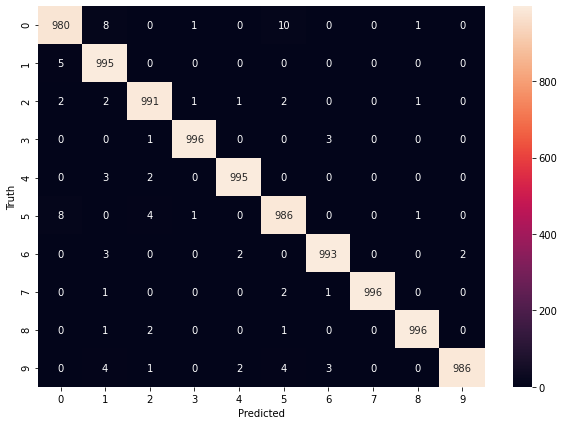

In [141]:
y_predictedc3 = modelc3.predict(x_test_2d_stan)
y_predicted_labelsc3 = [np.argmax(i) for i in y_predictedc3]
conf_mc3 = tf.math.confusion_matrix(labels = y_test_labels, predictions = y_predicted_labelsc3)

plt.figure(figsize = (10,7))
sn.heatmap(conf_mc3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Text(69.0, 0.5, 'Truth')

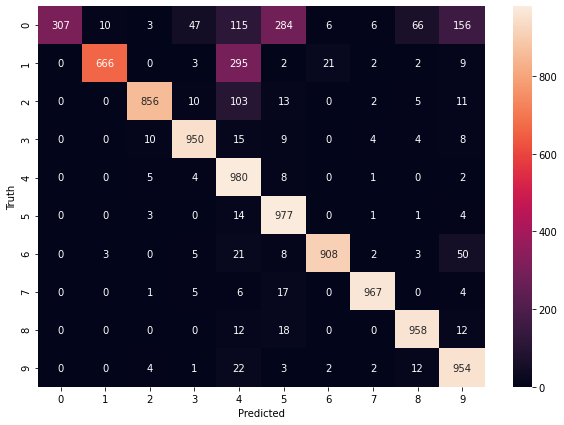

In [145]:
y_predicted1 = model1.predict(x_test_stan)
y_predicted_labels1 = [np.argmax(i) for i in y_predicted1]
conf_m1 = tf.math.confusion_matrix(labels = y_test_labels, predictions = y_predicted_labels1)

plt.figure(figsize = (10,7))
sn.heatmap(conf_m1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Network Comparison


In [147]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_2d_stan, y_train,
           batch_size = 128, 
           epochs = 10, 
           #validation_data=(x_test, y_test)),
           validation_split = 0.3,
           shuffle = True,
           verbose = 1)

print('> model evaluation')
model.evaluate(x_test_2d_stan, y_test, verbose = 1)

Epoch 1/10
329/329 [==============================] - 80s 241ms/step - loss: 0.1647 - accuracy: 0.9527 - val_loss: 0.0484 - val_accuracy: 0.9851
Epoch 2/10
329/329 [==============================] - 79s 240ms/step - loss: 0.0492 - accuracy: 0.9860 - val_loss: 0.0405 - val_accuracy: 0.9874
Epoch 3/10
329/329 [==============================] - 79s 240ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.0433 - val_accuracy: 0.9881
Epoch 4/10
329/329 [==============================] - 79s 240ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0369 - val_accuracy: 0.9899
Epoch 5/10
329/329 [==============================] - 79s 239ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.0337 - val_accuracy: 0.9907
Epoch 6/10
329/329 [==============================] - 79s 240ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0358 - val_accuracy: 0.9903
Epoch 7/10
329/329 [==============================] - 79s 239ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0355 - val_ac

[0.04109307751059532, 0.9897000193595886]